In [1]:
import matplotlib.pyplot as plt

In [2]:
x=[i for i in range(10)]

In [3]:
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
y=[2*i for i in range(10)]
y

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

## plot the graph

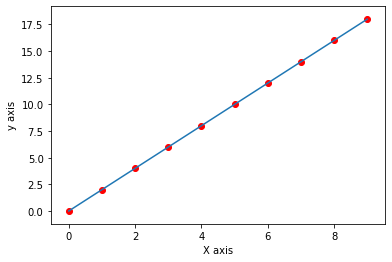

In [5]:
plt.plot(x,y)
plt.xlabel('X axis')
plt.ylabel('y axis')
plt.scatter(x,y,color='red')

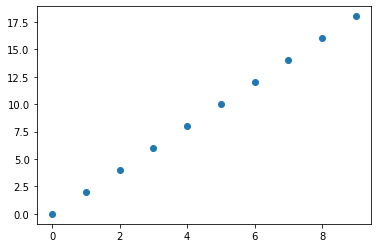

In [6]:
plt.scatter(x,y)

## Features and Labels
### Features are nothing but x data or source data where Labels are Y data or Target data 

# Classification of Machine Learning

## 1 Supervised Learning :
### In Supervised learning, you train the machine using data which is well "labeled." It means some data is already tagged with the correct answer. It can be compared to learning which takes place in the presence of a supervisor or a teacher.

### A supervised learning algorithm learns from labeled training data, helps you to predict outcomes for unforeseen data.
## Types of Supervised Machine Learning Algorithms 
### 1 Regression:
### Regression technique predicts a single output value using training data like predicting the house price from training data , where input variables will be locality, size of a house etc
### 2 Logistic Regression :
### Logistic regression method used to estimate discrete values based on given a set of independent variables. It helps you to predicts the probability of occurrence of an event by fitting data to a logit function. Therefore, it is also known as logistic regression. As it predicts the probability, its output value lies between 0 and 1

### Regression Examples:
### i Advertising Popularity Prediction
### ii Weather Forecasting
### iii Market Forcasting
### iv Estimating life expectancy
### v Predicting cost of House

### 3 Classification 

### Classification means to group the output inside a class. If the algorithm tries to label input into two distinct classes, it is called binary classification. Selecting between more than two classes is referred to as multiclass classification

### Examples:
### i Image classification
### ii Customer Relation
### iii Identify Fraud Detection


### 4 Naive Bayes Classifiers
### Naïve Bayesian model (NBN) is easy to build and very useful for large datasets. This method is composed of direct acyclic graphs with one parent and several children. It assumes independence among child nodes separated from their parent. This follows a group of algorithms based on bayes Theorem


 


### 5 Decision Tree
### Decisions trees classify instance by sorting them based on the feature value. In this method, each mode is the feature of an instance. It should be classified, and every branch represents a value which the node can assume. It is a widely used technique for classification. In this method, classification is a tree which is known as a decision tree.


### 6 Support Vector Machine
### Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems.

### 7 KNN Classifier
### K Nearest Neighbors is used in  regression and classification problems.KNN algorithms use data and classify new data points based on similarity measures 

## KNN HANDSON

In [7]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
data = pd.read_csv('car.data')

In [9]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [10]:
x = data[['buying','maint','safety']].values
y=data[['class']]
x,y

(array([['vhigh', 'vhigh', 'low'],
        ['vhigh', 'vhigh', 'med'],
        ['vhigh', 'vhigh', 'high'],
        ...,
        ['low', 'low', 'low'],
        ['low', 'low', 'med'],
        ['low', 'low', 'high']], dtype=object),       class
 0     unacc
 1     unacc
 2     unacc
 3     unacc
 4     unacc
 ...     ...
 1723   good
 1724  vgood
 1725  unacc
 1726   good
 1727  vgood
 
 [1728 rows x 1 columns])

### converting x

In [11]:
Le =LabelEncoder()

In [12]:
for i in range(len(x[0])):
    x[:,i]= Le.fit_transform(x[:,i])

In [13]:
x

array([[3, 3, 1],
       [3, 3, 2],
       [3, 3, 0],
       ...,
       [1, 1, 1],
       [1, 1, 2],
       [1, 1, 0]], dtype=object)

### Converstion y

In [14]:
label_mapping ={
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}

In [15]:
y['class']=y['class'].map(label_mapping)
y=np.array(y)
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


C:\Users\thane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Create model

In [16]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25,weights='uniform')

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [18]:
knn.fit(x_train,y_train)

C:\Users\thane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [19]:
prediction = knn.predict(x_test)

In [20]:
accuracy = metrics.accuracy_score(y_test,prediction)

In [21]:
prediction

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       3, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [22]:
accuracy


0.7109826589595376

In [23]:
a=296
print("actual value: ",y[a])
print("Predicted value: ",knn.predict(x)[a])

actual value:  [1]
Predicted value:  1


## Support Vector Machine
### Effectivve high dimensional spaces
### Many kernel functions
### Classification and regression

In [24]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split


In [25]:
iris= datasets.load_iris()

In [26]:
x=iris.data
y=iris.target

x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
classes=['Iris Setosa','Iris Versicolour','Iris Virginica']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [30]:
from sklearn import svm

In [31]:
model =svm.SVC()

In [32]:
model.fit(x_train,y_train)

C:\Users\thane\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
prediction = model.predict(x_test)
prediction

array([2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0,
       0, 1, 0, 2, 2, 1, 0, 2])

In [36]:
acc=accuracy_score(y_test,prediction)
acc


0.9666666666666667

In [37]:
y_test

array([2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0,
       0, 1, 0, 2, 1, 1, 0, 2])

## Linear regression


In [38]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [39]:
boston=datasets.load_boston()

In [40]:
x=boston.data # feature

In [41]:
y=boston.target

In [42]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [43]:
x.shape

(506, 13)

In [44]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [45]:
l_reg =linear_model.LinearRegression()

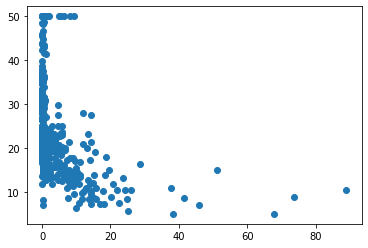

In [46]:
plt.scatter(x.T[0],y)

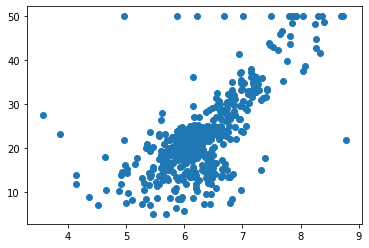

In [47]:
plt.scatter(x.T[5],y)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
model=l_reg.fit(x_train,y_train)

In [50]:
predictions = model.predict(x_test)

In [51]:
predictions

array([24.69956111, 25.1780359 , 16.78556489, 35.69272128, 20.56485538,
        9.02317957, 36.87075001, 28.78099254, 19.0290928 , 18.57654329,
       20.71704348, 11.91184269, 16.64995632, 27.39818516, 29.43229424,
       25.63434957, 17.67758985, 27.35943882, 10.22773779, 21.33349459,
       36.81913671, 25.97350737, 35.76677112, 39.35924665, 14.55942909,
       29.65440624, 20.25712888, 22.18701062, 21.60348108,  1.22815471,
       38.64017215, 23.80240316, 20.60311258, 36.22139023, 18.51787305,
       18.34741587, 19.59206166, 23.36430177, 20.79333511, 21.28505619,
       20.73529425, 33.58323988, 32.27120362, 30.65673512, 31.30281031,
       19.28335713, 12.73440972, 17.9835187 , 12.11783555, 18.0889121 ,
       19.53573079, 27.66372021, 23.12913537, 21.38224144, 23.23404841,
       19.96227899, 17.7399187 , 35.60577881, 33.77956124, 18.45080666,
       28.54652384, 19.42135711, 18.80593007, 25.53045702, 18.26558922,
       13.8988726 , 21.29966033, 20.25427921, 17.1904416 , 30.67

In [52]:
l_reg.score(x,y)

0.7394807973103678

In [53]:
l_reg.coef_

array([-1.11271093e-01,  5.50396644e-02,  4.30095027e-02,  1.82974729e+00,
       -1.85731404e+01,  3.62648058e+00, -1.05331047e-03, -1.53146535e+00,
        3.26992592e-01, -1.39762591e-02, -9.18512833e-01,  8.72438773e-03,
       -5.23496602e-01])

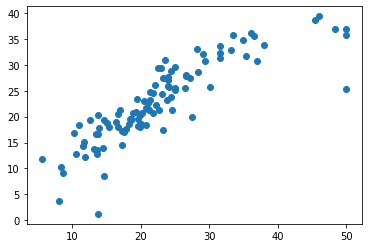

In [54]:
plt.scatter(y_test,predictions)

In [55]:
l_reg.intercept_

38.18386799265849

## K Mean

In [56]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

In [58]:
bc =load_breast_cancer()

In [59]:
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [60]:
x=scale(bc.data)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [61]:
y=bc.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=6)
model=KMeans(n_clusters=2,random_state=0)

In [63]:
model.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [64]:
predictions=model.predict(x_test)

In [65]:
labels=model.labels_

In [66]:
print("labels",labels)
print("predictions",predictions)
print("accuracy",accuracy_score(y_test,predictions))
print("actual",y_test)

labels [0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0
 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0
 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0

In [67]:
pd.crosstab(y_train,labels)

col_0,0,1
row_0,,
0,35,174
1,336,18
